#### Exploratory Data Analysis on AirBnb Data from 2016 - 2021

This was an early Data Science project from DSC530, and it involves Exploratory Data Analysis (EDA).

I used AirBnb data from NYC that included pricing, rental property type, number of reviews, reviews per month, and date of last review to look for any trends in the data. This was of interest to me because of the timeframe for the data, which has early AirBnb data up through the pandemic that started in early 2020. The data runs through late 2021, when vaccine availability led to increased travel and use of AirBnb properties. 

The EDA used here involves exploring and visualizing relationships between the different data points. 

For this, I mostly relied on thinkplot and thinkstats2. I used histographs and scatter plots to visually explore the data. I used Probability Mass Function (PMF) to investigate whether the variable relationships were random or not. Pearsons and Spearmans Correlation coeffients were used to investigate the strength of any correlations. I also used single (Least Squares) and multiple regression analysis (OLS Regression), also to investigate the strength of correlation between variables in the data. 

Notable findings were that there appears to be an increase in AirBnb use/spending/reviews toward the end of 2021. This is noticeable because the increase shows more use/spending/reviews after the pandemic than at any point before the pandemic. This prompts the question of Why that may be. Is this consumers wanted to travel as soon as restrictions started to lift? Were prices lowered in hopes of greater demand? Was the reverse true? These questions weren't investigated as part of this EDA project, but would make a great follow-up, especially now that the AirBnb market is cooling.


In [103]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import csv
import pandas as pd
import thinkplot
import thinkstats2
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
import statsmodels.formula.api as smf

In [2]:
dfnyc1 = pd.read_csv('nyc2.csv')

C:\Users\joelm\AppData\Local\Temp\ipykernel_23296\1411390149.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnyc1 = pd.read_csv('nyc2.csv')


In [4]:
rmtp = dfnyc1

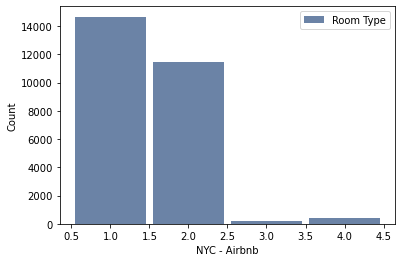

In [6]:
# Room Type
hist = thinkstats2.Hist(dfnyc1.room_type, label='Room Type')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='NYC - Airbnb', ylabel='Count')


# The Entire Home rental type is most popular
# The data appears skewed to the right, this is due to the arbitrary order in which I
# assigned the different room types to numeric data where:
# 1 = entire home/apartment
# 2 = private room within a residence
# 3 = hotel room
# 4 = shared room


In [13]:
#Stats for room type
mean = rmtp.room_type.mean()
var = rmtp.room_type.var()
std = rmtp.room_type.std()

print('The Mean is:', mean, 
      '\nThe Variance is:', var, 
      '\nThe Standard Deviation is:',std)

The Mean is: 1.487286072725911 
The Variance is: 0.3521621459699705 
The Standard Deviation is: 0.5934325117230859


[(4000.0, 2),
 (3900.0, 1),
 (3557.0, 1),
 (3396.0, 1),
 (3000.0, 2),
 (2614.0, 2),
 (2536.0, 1),
 (2500.0, 6),
 (2400.0, 1),
 (2299.0, 1)]

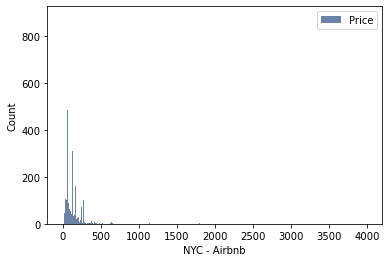

In [8]:
# Price
hist = thinkstats2.Hist(rmtp.price, label='Price')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='NYC - Airbnb', ylabel='Count')
# Similar to the number of reviews, the pricing is also skewed toward lower 
# pricing with a higher count
hist.Largest()

In [16]:
# Stats for price
mean = rmtp.price.mean()
var = rmtp.price.var()
std = rmtp.price.std()

print('The Mean is:', mean, 
      '\nThe Variance is:', var, 
      '\nThe Standard Deviation is:',std)

The Mean is: 151.60202973448676 
The Variance is: 28301.967784061133 
The Standard Deviation is: 168.23188694198592


[(1006.0, 1),
 (735.0, 1),
 (655.0, 1),
 (651.0, 1),
 (630.0, 1),
 (586.0, 1),
 (585.0, 2),
 (581.0, 1),
 (575.0, 1),
 (574.0, 1)]

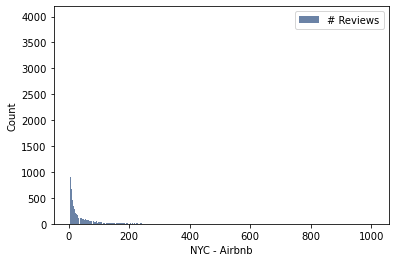

In [14]:
# Number of reviews
hist = thinkstats2.Hist(rmtp.num_revs, label='# Reviews')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='NYC - Airbnb', ylabel='Count')
hist.Largest()

In [17]:
# Stats for number of reviews
mean = rmtp.num_revs.mean()
var = rmtp.num_revs.var()
std = rmtp.num_revs.std()

print('The Mean is:', mean, 
      '\nThe Variance is:', var, 
      '\nThe Standard Deviation is:',std)

The Mean is: 31.5894094296521 
The Variance is: 3101.786243913857 
The Standard Deviation is: 55.6936822621189


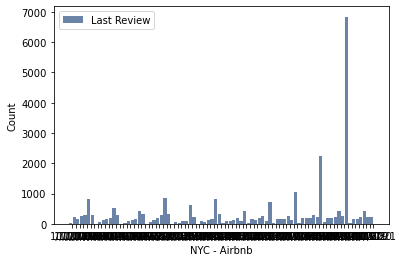

In [18]:
# Date of last review
hist = thinkstats2.Hist(rmtp.last_review, label='Last Review')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='NYC - Airbnb', ylabel='Count')
# Shows 'entire home' rentals over time, from january 2016-september 2021 in NYC. 
# Count by month

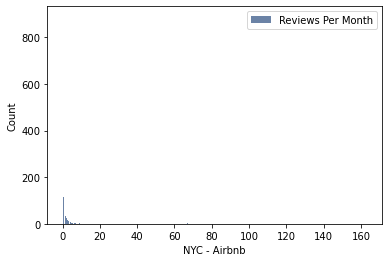

In [21]:
# Reviews per month
hist = thinkstats2.Hist(rmtp.reviews_per_month, label='Reviews Per Month')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='NYC - Airbnb', ylabel='Count')
# I am not discarding outliers for this b/c even though only 3 properties of any
# type have more than 150 reviews in a month average, they're notable for the fact 
# that they are from August and September 2021

In [22]:
# Stats for reviews per month
# Stats for number of reviews
mean = rmtp.reviews_per_month.mean()
var = rmtp.reviews_per_month.var()
std = rmtp.reviews_per_month.std()

print('The Mean is:', mean, 
      '\nThe Variance is:', var, 
      '\nThe Standard Deviation is:',std)

The Mean is: 1.5001063550912195 
The Variance is: 16.881598992508266 
The Standard Deviation is: 4.108722306570288


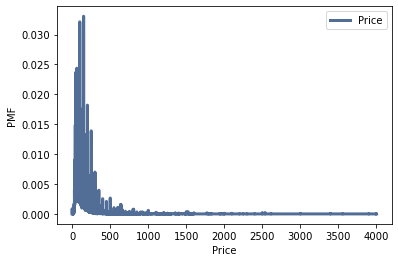

In [23]:
# Using Probability Mass Function (PMF) to compare 2 scenarios for one variable

pmf = thinkstats2.Pmf(rmtp.price, label = 'Price')

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Price', ylabel='PMF')

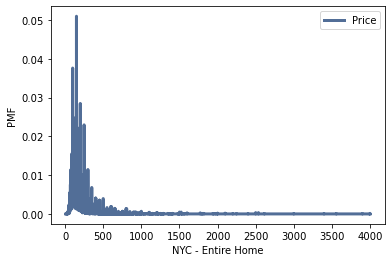

In [25]:
# For entire home rental
rmtp2 = dfnyc1[dfnyc1.room_type == 1]
pmf2 = thinkstats2.Pmf(rmtp2.price, label='Price')

thinkplot.Pmf(pmf2)
thinkplot.Config(xlabel='NYC - Entire Home', ylabel='PMF')

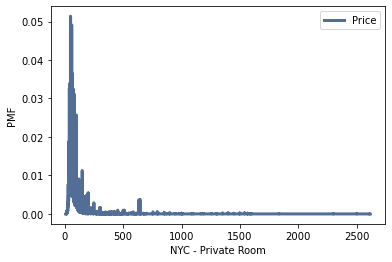

In [26]:
# For private room within a residence
rmtp3 = dfnyc1[dfnyc1.room_type == 2]
pmf3 = thinkstats2.Pmf(rmtp3.price, label='Price')

thinkplot.Pmf(pmf3)
thinkplot.Config(xlabel='NYC - Private Room', ylabel='PMF')

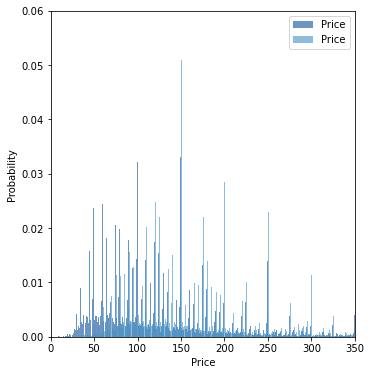

In [27]:
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(pmf, align = 'right')
thinkplot.Hist(pmf2, align = 'left')
thinkplot.Config(xlabel = 'Price', 
                 ylabel = 'Probability',
                 axis = [0, 350, 0, .06])

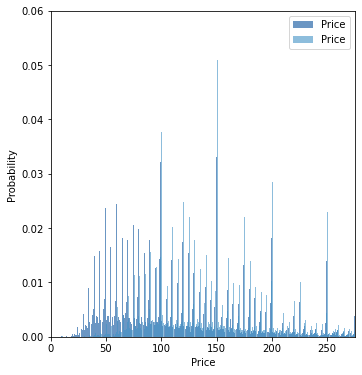

In [28]:
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(pmf, align = 'right')
thinkplot.Hist(pmf2, align = 'left')
thinkplot.Config(xlabel = 'Price', 
                 ylabel = 'Probability',
                 axis = [0, 275, 0, .06])

0.9759577575553309

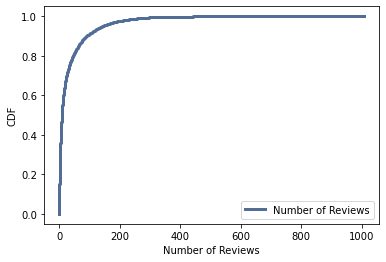

In [29]:
# Cumulative Distribution Function (CDF) for variables
# Number of reviews
cdf = thinkstats2.Cdf(rmtp.num_revs, label = 'Number of Reviews')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel = 'Number of Reviews', 
                 ylabel = 'CDF', loc = 'lower right')

cdf.Prob(200)

# 98% probability of having 200 or fewer reviews

In [30]:
cdf.Prob(150)

# 95% probability of having 150 or fewer reviews, and so on...

0.9537879638991874

In [31]:
cdf.Prob(50)

0.8120435906077969

In [32]:
cdf.Prob(30)

# The above shows the probability that one will have x-number of reviews or fewer. 

0.7344118638355241

0.8249634872486238

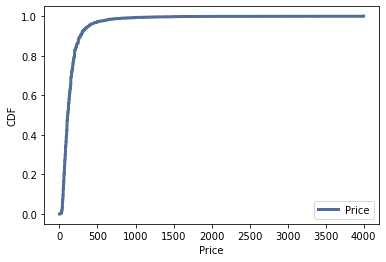

In [33]:
# Price
cdf2 = thinkstats2.Cdf(rmtp.price, label = 'Price')
thinkplot.Cdf(cdf2)
thinkplot.Config(xlabel = 'Price', 
                 ylabel = 'CDF', loc = 'lower right')

cdf2.Prob(200)

# 82% probability of price less than $200

In [34]:
cdf2.Prob(100)

# 47% probability of price less than $100

0.4707710744111149

In [35]:
cdf2.Prob(400)

# The above shows information on price ranges in NYC Airbnbs. There is a 47% probability that
# the price will be below $100/night, while at $400/night there's a 95% probability of finding
# an Airbnb property (of any type).

0.9575703104520091

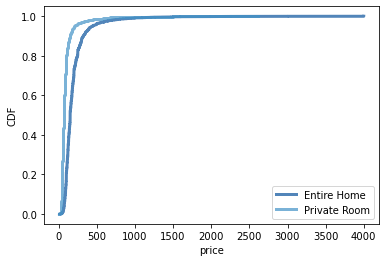

<Figure size 576x432 with 0 Axes>

In [36]:
# This comparison shows that private room pricing is usually lower than pricing for entire residences
entire_cdf = thinkstats2.Cdf(rmtp2.price, label = 'Entire Home')
prv_rm_cdf = thinkstats2.Cdf(rmtp3.price, label = 'Private Room')

thinkplot.PrePlot(2)
thinkplot.Cdfs([entire_cdf, prv_rm_cdf])
thinkplot.Show(xlabel = 'price', ylabel = 'CDF')

In [37]:
# Plotting 1 analytical distribution with analysis of application to my dataset
import scipy.stats

dfnyc1 = pd.read_csv('nyc2.csv')
prices = dfnyc1.price.dropna()

C:\Users\joelm\AppData\Local\Temp\ipykernel_23296\1704096483.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnyc1 = pd.read_csv('nyc2.csv')


In [39]:
# Normal distribution
mu, var = thinkstats2.TrimmedMeanVar(prices, p=0.01)
print('Mean:', mu, '\nVariance:',var)

Mean: 141.0777255531354 
Variance: 11816.853754680153


In [40]:
# Sigma
sigma = np.sqrt(var)
print('Sigma:', sigma)

Sigma: 108.70535292560415


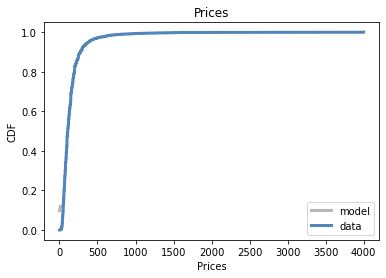

In [45]:
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)
thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(prices, label='data')
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Prices',
                 xlabel='Prices',
                 ylabel='CDF',
                 loc = 'lower right')

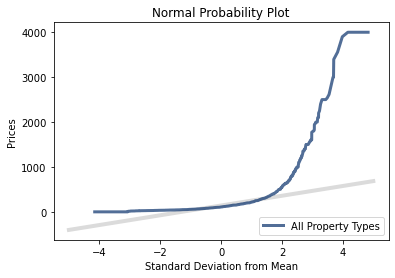

In [47]:
# Normal Probability Plot below 
mean, var = thinkstats2.TrimmedMeanVar(prices, p = 0.01)
std = np.sqrt(var)

xs = [-5, 5]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth = 4, color = '0.8')

xs, ys = thinkstats2.NormalProbability(prices)
thinkplot.Plot(xs, ys, label = 'All Property Types')
thinkplot.Config(title = 'Normal Probability Plot', 
                 xlabel = 'Standard Deviation from Mean',
                 ylabel = 'Prices')

C:\Users\joelm\AppData\Local\Temp\ipykernel_23296\1126741024.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnyc1 = pd.read_csv('nyc2.csv')


n, mean, std 26703 141.0777255531354 108.70535292560415


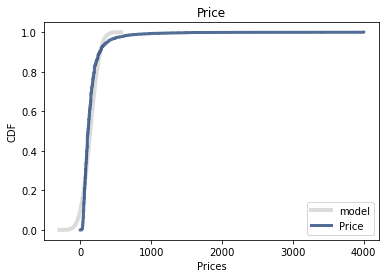

In [58]:
# Lognormal Model

dfnyc1 = pd.read_csv('nyc2.csv')
price = dfnyc1.price.dropna()

def MakeNormalModel(price):
    ''' Plots a CDF with a Normal model '''
    
    cdf = thinkstats2.Cdf(price, label='Price')

    mean, var = thinkstats2.TrimmedMeanVar(price)
    std = np.sqrt(var)
    print('n, mean, std', len(price), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

MakeNormalModel(price)
thinkplot.Config(title='Price', xlabel='Prices',
                 ylabel='CDF', loc='lower right')

n, mean, std 26703 2.0537340181736554 0.2798442611404363


C:\Users\joelm\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


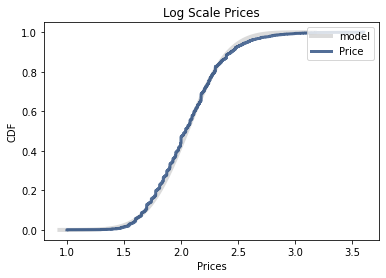

In [56]:
# Lognormal price
log_price = np.log10(price)
MakeNormalModel(log_price)
thinkplot.Config(title='Log Scale Prices', xlabel='Prices',
                 ylabel='CDF', loc='upper right')

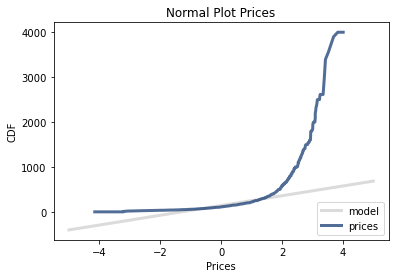

In [57]:
# Normal probability plot 

def MakeNormalPlot(price):
    # Generates a normal probability plot of birth weights 
    
    mean, var = thinkstats2.TrimmedMeanVar(price, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(price)
    thinkplot.Plot(xs, ys, label='prices')

MakeNormalPlot(price)
thinkplot.Config(title='Normal Plot Prices', xlabel='Prices',
                 ylabel='CDF', loc='lower right')

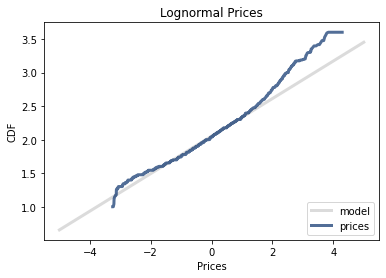

In [59]:
# Lognormal probability plot
MakeNormalPlot(log_price)
thinkplot.Config(title = 'Lognormal Prices',
                 xlabel = 'Prices',
                 ylabel = 'CDF', 
                 loc = 'lower right')

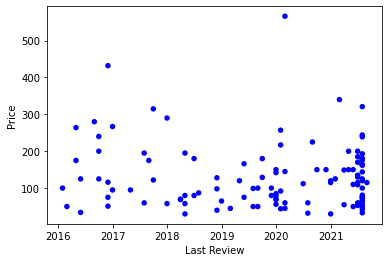

In [60]:
# Scatter plot of price vs. last review date - Shows a significant
# increase in Last Review dates toward late 2021
df = pd.read_csv('nyc2.csv', parse_dates = [4], nrows = None)
df.head()

def SampleRows(df, nrows, replace = False):
    indices = np.random.choice(df.index, nrows, replace = replace)
    sample = df.loc[indices]
    return sample

sample = SampleRows(df, 5000)
last_review, price = sample.last_review, sample.price

thinkplot.Scatter(last_review, price, alpha=1)
thinkplot.Config(xlabel='Last Review',
                 ylabel='Price',
                 legend=False)

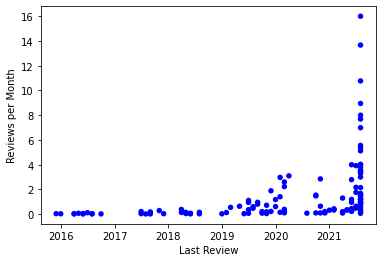

In [61]:
# Increase in reviews per month toward late 2021 is noteworthy
sample = SampleRows(df, 5000)
last_review, reviews_per_month = sample.last_review, sample.reviews_per_month

thinkplot.Scatter(last_review, reviews_per_month, alpha=1)
thinkplot.Config(xlabel='Last Review',
                 ylabel='Reviews per Month',
                 legend=False)

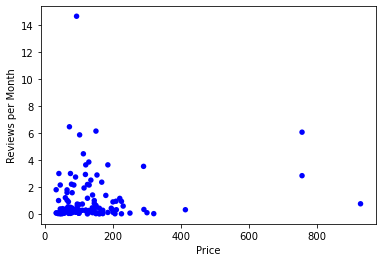

In [62]:
# Greater concentration of lower prices with more reviews per month,
# though there are several outliers
sample = SampleRows(df, 5000)
price, reviews_per_month = sample.price, sample.reviews_per_month

thinkplot.Scatter(price, reviews_per_month, alpha=1)
thinkplot.Config(xlabel='Price',
                 ylabel='Reviews per Month',
                 legend=False)

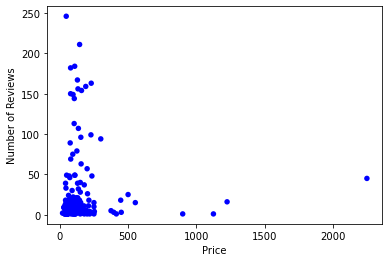

In [63]:
# Price and number of reviews
# In line with previous observations - lower prices garner more reviews
# Opportunity to look into if this is due to broader accessibility to
# lower priced rentals
sample = SampleRows(df, 5000)
price, num_revs = sample.price, sample.num_revs

thinkplot.Scatter(price, num_revs, alpha=1)
thinkplot.Config(xlabel='Price',
                 ylabel='Number of Reviews',
                 legend=False)

In [64]:
# Exploring covariance
cleaned = df.dropna(subset = ['id', 'room_type', 'price', 'num_revs', 'last_review',
                              'reviews_per_month'])

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [66]:
# Price - Room Type
price, room_type = cleaned.price, cleaned.room_type
Cov(price, room_type)

-25.978077777970334

In [67]:
# Price - Reviews per Month
price, reviews_per_month = cleaned.price, cleaned.reviews_per_month
Cov(price, reviews_per_month)

3.6769164601563125

In [68]:
# Price - Number of Reviews
price, num_revs = cleaned.price, cleaned.num_revs
Cov(price, num_revs)

-360.40419975250296

In [69]:
# Pearsons Correlation (PC)
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [71]:
# PC Price - Number of Reviews
Corr(price, num_revs)

-0.03846731363217718

In [72]:
# Correlation coefficient
np.corrcoef(price, num_revs)

array([[ 1.        , -0.03846731],
       [-0.03846731,  1.        ]])

In [73]:
# PC Price - Reviews per Month
Corr(price, reviews_per_month)

0.005319672802547272

In [74]:
# Correlation coefficient
np.corrcoef(price, reviews_per_month)

array([[1.        , 0.00531967],
       [0.00531967, 1.        ]])

In [77]:
# PC Price - Room Type
Corr(price, room_type)

-0.26022176903146954

In [78]:
# Correlation coefficient
np.corrcoef(price, room_type)

array([[ 1.        , -0.26022177],
       [-0.26022177,  1.        ]])

In [75]:
# Spearmans Correlation (SC)
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [76]:
# SC Price - Number of Reviews
SpearmanCorr(price, num_revs)

0.02297214413990005

In [79]:
# SC Price - Reviews per Month
SpearmanCorr(price, reviews_per_month)

0.08073285555771544

In [80]:
# SC Price - Room Type
SpearmanCorr(price, room_type)

-0.6012547029198939

In [82]:
# Hypothesis Testing
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

class CoinTest(HypothesisTest):

    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
  
# Correlation testing
class CorrelationPermute(thinkstats2.HypothesisTest):

   def TestStatistic(self, data):
       xs, ys = data
       test_stat = abs(thinkstats2.Corr(xs, ys))
       return test_stat

   def RunModel(self):
       xs, ys = self.data
       xs = np.random.permutation(xs)
       return xs, ys   

In [83]:
df = pd.read_csv('nyc5.csv', nrows=None) # this line to convert Last Review
# to a range of numbers that can be used as opposed to the dates

df.head()

,id,room_type,price,num_revs,last_review,reviews_per_month
0,2595.0,1.0,150.0,48.0,43770.0,0.33
1,3831.0,1.0,76.0,408.0,44348.0,5.03
2,5121.0,2.0,60.0,50.0,42522.0,0.54
3,5136.0,1.0,275.0,2.0,44409.0,0.02
4,5178.0,2.0,68.0,490.0,44409.0,3.64


In [84]:
cleaned = df.dropna(subset = ['id', 'room_type', 'price', 'num_revs', 'last_review',
                              'reviews_per_month'])

In [85]:
# Price - Last Review  
data = cleaned.price.values, cleaned.last_review.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue  

# P Value of 0 - unlikely that these are by chance

0.0

In [87]:
# Price - Reviews per Month 
data = cleaned.price.values, cleaned.reviews_per_month.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue  

# Relationship possibly by chance

0.384

In [88]:
# Price - Number of Reviews  
data = cleaned.price.values, cleaned.num_revs.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue  

# Unlikely to be by chance

0.0

In [89]:
# Regression Analysis - One Dependent + One Explanatory Var 

# SINGLE REGRESSION

df = pd.read_csv(r'nyc5.csv', nrows = None)  
cleaned = df.dropna(subset = ['id', 'room_type', 'price', 'num_revs', 'last_review',
                              'reviews_per_month'])    
    
price = cleaned.price    
num_revs = cleaned.num_revs    
revs_per_month = cleaned.reviews_per_month    
last_review = cleaned.last_review

In [91]:
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope    
    
inter, slope = LeastSquares(price, num_revs)
inter, slope 

(33.52001916104186, -0.012734722185256989)

In [92]:
inter, slope = LeastSquares(price, revs_per_month)
inter, slope      

(1.4804098845607434, 0.00012992220859425215)

In [93]:
inter, slope = LeastSquares(num_revs, revs_per_month)
inter, slope 

(0.7801616462214668, 0.022790698587544997)

In [94]:
inter, slope = LeastSquares(num_revs, price)
inter, slope 

(155.27261864737198, -0.11619681973034132)

In [95]:
inter, slope = LeastSquares(price, last_review)
inter, slope    

# The dates represented here fall around January 2020

(43832.71896145397, 0.2838857614761463)

In [97]:
inter, slope = LeastSquares(num_revs, last_review)
inter, slope  

# Date is between November and December of 2019

(43786.77562649456, 2.816798231384011)

In [98]:
inter, slope = LeastSquares(revs_per_month, last_review)
inter, slope    

# Date is between December 2019 and January 2020  

(43819.915141017795, 37.225012679369414)

In [99]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

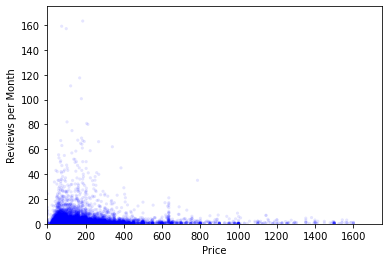

In [100]:
# Price and Reviews per Month
fit_xs, fit_ys = FitLine(price, inter, slope)

thinkplot.Scatter(price, revs_per_month, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Price",
                 ylabel='Reviews per Month',
                 axis = [0, 1750, 0, 175],
                 legend=False)

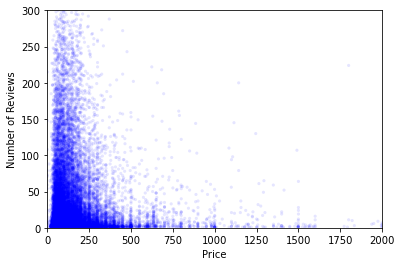

In [101]:
# Price and Number of Reviews
fit_xs, fit_ys = FitLine(price, inter, slope)

thinkplot.Scatter(price, num_revs, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Price",
                 ylabel='Number of Reviews',
                 axis = [0, 2000, 0, 300],
                 legend=False)

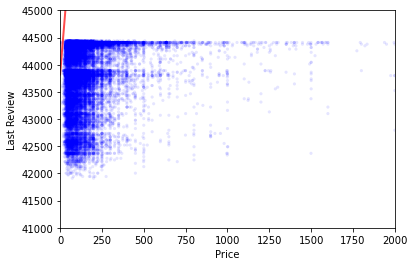

In [102]:
# Price - Last Review
fit_xs, fit_ys = FitLine(price, inter, slope)

thinkplot.Scatter(price, last_review, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Price",
                 ylabel='Last Review',
                 axis = [0, 2000, 41000, 45000],
                 legend=False)

In [104]:
# MULTIPLE REGRESSION#

#OLS Regression - Number of Reviews / Last Review
df = pd.read_csv(r'nyc5.csv', nrows = None)  
cleaned = df.dropna(subset = ['id', 'room_type', 'price', 'num_revs', 'last_review',
                              'reviews_per_month'])    

formula = 'num_revs ~ last_review'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_revs   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1927.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:13:33   Log-Likelihood:            -1.4430e+05
No. Observations:               26703   AIC:                         2.886e+05
Df Residuals:                   26701   BIC:                         2.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1016.8445     23.886    -42.570      0.000   -1063.663    -970.026
last_review     0.0239      0.001     43.897      0.000       0.023       0.025
==============================================================================
Omnibus:                    20753.897   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           551707.839
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      24.095   Cond. No.                     3.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# OLS Regression - Number of Reviews / Price
formula = 'num_revs ~ price'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_revs   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     39.57
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           3.22e-10
Time:                        17:13:43   Log-Likelihood:            -1.4521e+05
No. Observations:               26703   AIC:                         2.904e+05
Df Residuals:                   26701   BIC:                         2.904e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5200      0.458     73.114      0.000      32.621      34.419
price         -0.0127      0.002     -6.290      0.000      -0.017      -0.009
==============================================================================
Omnibus:                    20952.866   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529231.360
Skew:                           3.642   Prob(JB):                         0.00
Kurtosis:                      23.557   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# OLS Regression - Last Review / Price
formula = 'last_review ~ price'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            last_review   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     167.6
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           3.21e-38
Time:                        17:15:10   Log-Likelihood:            -2.0883e+05
No. Observations:               26703   AIC:                         4.177e+05
Df Residuals:                   26701   BIC:                         4.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.383e+04      4.966   8826.986      0.000    4.38e+04    4.38e+04
price          0.2839      0.022     12.946      0.000       0.241       0.327
==============================================================================
Omnibus:                     3403.975   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4907.080
Skew:                          -1.049   Prob(JB):                         0.00
Kurtosis:                       3.105   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# OLS Regression - Last Review / Number of Reviews
formula = 'last_review ~ num_revs'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            last_review   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1927.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:15:28   Log-Likelihood:            -2.0798e+05
No. Observations:               26703   AIC:                         4.160e+05
Df Residuals:                   26701   BIC:                         4.160e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.379e+04      4.109   1.07e+04      0.000    4.38e+04    4.38e+04
num_revs       2.8168      0.064     43.897      0.000       2.691       2.943
==============================================================================
Omnibus:                     2860.245   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3900.753
Skew:                          -0.936   Prob(JB):                         0.00
Kurtosis:                       2.960   Cond. No.                         73.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### References

Downey, A. B. (2011). Think Stats (1st ed.). O’Reilly. 

Get the Data. Inside Airbnb. (n.d.). http://insideairbnb.com/get-the-data/ 